<a href="https://colab.research.google.com/github/mlan4/Lecture-1-Repo/blob/master/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9500552111008128
0.9500552111008129
1.0442415398322409
1.044241539832241


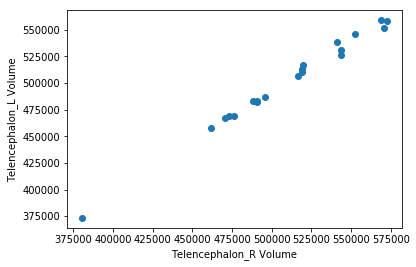

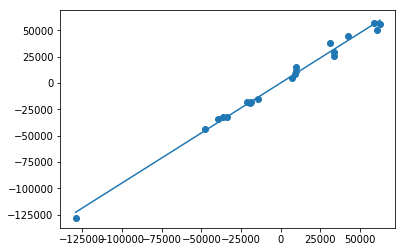

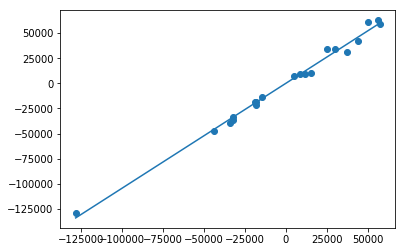

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi

df = pd.read_csv("/content/kirby21.csv")
  
df.head(6)

df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'], axis = 1)
telleft = df.loc[(df.type == 1) & (df.level == 1) & (df.roi == 'Telencephalon_L')]
telrigh = df.loc[(df.type == 1) & (df.level == 1) & (df.roi == 'Telencephalon_R')]
volleft = telleft.volume
volrigh = telrigh.volume

plt.figure()
plt.scatter(volrigh, volleft)
plt.xlabel('Telencephalon_R Volume')
plt.ylabel('Telencephalon_L Volume')

volleft_dm = volleft - np.mean(volleft)
volrigh_dm = volrigh - np.mean(volrigh)

b2 = np.sum(np.dot(volleft_dm, volrigh_dm)) / np.sum(np.dot(volleft_dm, volleft_dm))
x2 = np.linspace(np.min(volleft_dm), np.max(volleft_dm))
y2 = b2 * x2

b2s = stat.linregress(volleft_dm, volrigh_dm)

b1 = np.sum(np.dot(volleft_dm, volrigh_dm)) / np.sum(np.dot(volrigh_dm, volrigh_dm))
x1 = np.linspace(np.min(volrigh_dm), np.max(volrigh_dm))
y1 = b1 * x1

b1s = stat.linregress(volrigh_dm, volleft_dm)

plt.figure()
plt.scatter(volrigh_dm, volleft_dm)
plt.plot(x1, y1)

plt.figure()
plt.scatter(volleft_dm, volrigh_dm)
plt.plot(x2, y2)

print(b1)
print(b1s.slope)
print(b2)
print(b2s.slope)


In the case where we replace $x$ with $cx$ where $c$ is a positive constant, then we would instead be minimizing the value of $\sum (y_i - \beta c x_i)^2$, which would give the derivative:
$\frac{\partial}{\partial\beta} \sum(y_i - \beta c x_i)^2 = 2\sum (y_i - c x_i \beta)c x_i = 0 $

$\sum (y_i x_i c) = \sum (c \beta x_i^2) $

$\sum (y_i x_i) = \beta \sum ( x_i^2) $

$\frac{\sum (y_i x_i)}{\sum(x_i^2)} = \beta $

Thus, changing $x$ to be $cx$ where $c$ is a positive constant would not change the value of $\beta$ for a demeaned sample

